In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('../../data/processed/cleaned_music_population.csv')
df.head()

,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,27.0,0.00468,0.652,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,0.759,Electronic
1,31.0,0.01270,0.622,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.002,0.531,Electronic
2,28.0,0.00306,0.620,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,0.333,Electronic
3,34.0,0.02540,0.774,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,0.270,Electronic
4,32.0,0.00465,0.638,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,0.323,Electronic


In [7]:
df_onehot = pd.get_dummies(df, drop_first=True)
df_onehot.shape, df.shape

((45020, 31), (45020, 13))

Recordar utilizar varibles con one hot emcoding para ver si los modelos mejoran.

In [8]:
X = df_onehot.drop(columns=['popularity'])
y = df_onehot['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

In [9]:
df_results = X_test.copy()
df_results['popularity_real'] = y_test
df_results['popularity_pred'] = y_pred.round(2)

df_results.head(10)

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,key_A#,...,music_genre_Blues,music_genre_Classical,music_genre_Country,music_genre_Electronic,music_genre_Hip-Hop,music_genre_Jazz,music_genre_Rap,music_genre_Rock,popularity_real,popularity_pred
7977,0.107000,0.531,0.5500,0.000000,0.0950,-6.328,0.0233,96.084,0.3550,False,...,False,False,False,False,False,False,False,False,36.0,25.24
1928,0.000934,0.632,0.9520,0.505000,0.1120,-6.115,0.0414,148.007,0.5890,False,...,False,False,False,True,False,False,False,False,28.0,38.73
5641,0.616000,0.625,0.3050,0.000000,0.0926,-12.507,0.0307,136.053,0.3450,True,...,False,False,False,False,False,False,False,False,29.0,24.36
34707,0.053100,0.583,0.8330,0.000056,0.1600,-8.290,0.0343,119.884,0.8100,False,...,False,False,False,False,False,False,False,True,51.0,59.40
7609,0.000856,0.590,0.9780,0.000000,0.7950,-1.891,0.0934,129.967,0.6620,False,...,False,False,False,False,False,False,False,False,21.0,22.57
34300,0.141000,0.535,0.8030,0.000000,0.2970,-4.116,0.0465,147.902,0.3420,False,...,False,False,False,False,False,False,False,True,54.0,59.76
39926,0.788000,0.137,0.1700,0.881000,0.0988,-28.620,0.0508,55.050,0.0616,False,...,False,True,False,False,False,False,False,False,32.0,28.36
40154,0.982000,0.234,0.0319,0.928000,0.1260,-31.601,0.0416,58.481,0.0572,False,...,False,True,False,False,False,False,False,False,39.0,27.83
25875,0.754000,0.703,0.2190,0.863000,0.2240,-14.361,0.0888,91.963,0.1490,False,...,False,False,False,False,False,False,True,False,65.0,58.73
40342,0.969000,0.195,0.0275,0.000178,0.2310,-28.659,0.0494,172.913,0.0441,True,...,False,True,False,False,False,False,False,False,4.0,28.59


In [10]:
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

for idx, col_name in enumerate(X.columns):
    print(f'Coefficient for {col_name}: {model.coef_[idx]}')

Intercept: 44.222179031541536
Coefficients: [-9.59359616e-02  2.32829503e-01  8.09550507e-02 -5.57586014e-01
 -7.64968170e-01  7.11314728e-01 -5.93932631e-01 -3.78089567e-02
 -7.03097284e-02 -4.64110207e-04  1.08953816e-01  7.51068138e-02
  1.35208041e-01  6.48294555e-02  1.25923871e-02 -7.89001951e-03
  1.23551321e-02  1.00786689e-01  2.24375332e-02  1.56153100e-01
  1.99044734e-01 -7.63947256e+00 -4.50772411e+00 -5.41822827e+00
 -1.33385813e+00 -3.47668255e+00  2.54966495e+00 -2.52161082e+00
  3.15307065e+00  2.77185654e+00]
Coefficient for acousticness: -0.09593596163523611
Coefficient for danceability: 0.23282950252569812
Coefficient for energy: 0.08095505074142917
Coefficient for instrumentalness: -0.5575860138706353
Coefficient for liveness: -0.7649681700559444
Coefficient for loudness: 0.7113147283859387
Coefficient for speechiness: -0.593932631140225
Coefficient for tempo: -0.03780895673901069
Coefficient for valence: -0.07030972842260319
Coefficient for key_A#: -0.000464110206

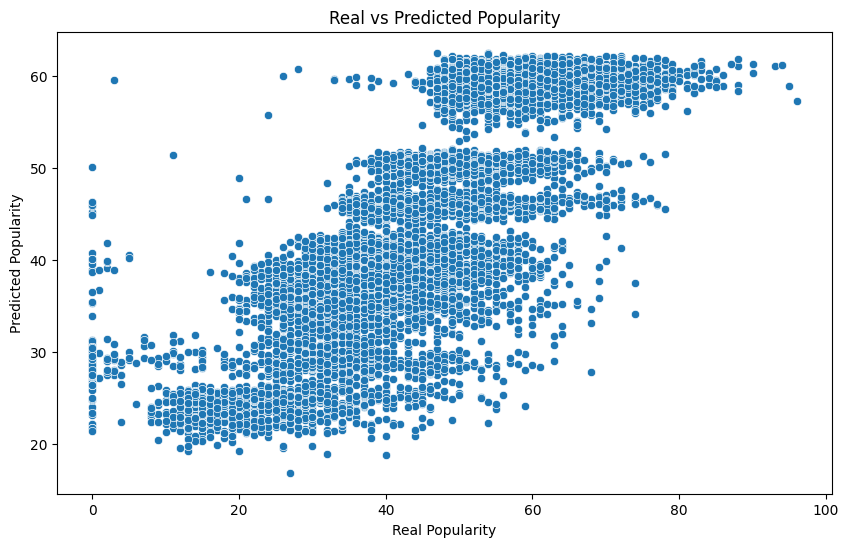

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='popularity_real', y='popularity_pred', data=df_results)
plt.title('Real vs Predicted Popularity')
plt.xlabel('Real Popularity')
plt.ylabel('Predicted Popularity')
plt.show()

In [12]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
rsme = mse ** 0.5
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rsme}')
print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')


Mean Squared Error: 92.55608187428854
Root Mean Squared Error: 9.62060714686389
R-squared: 0.6223177005509604
Mean Absolute Error: 7.21227193105684


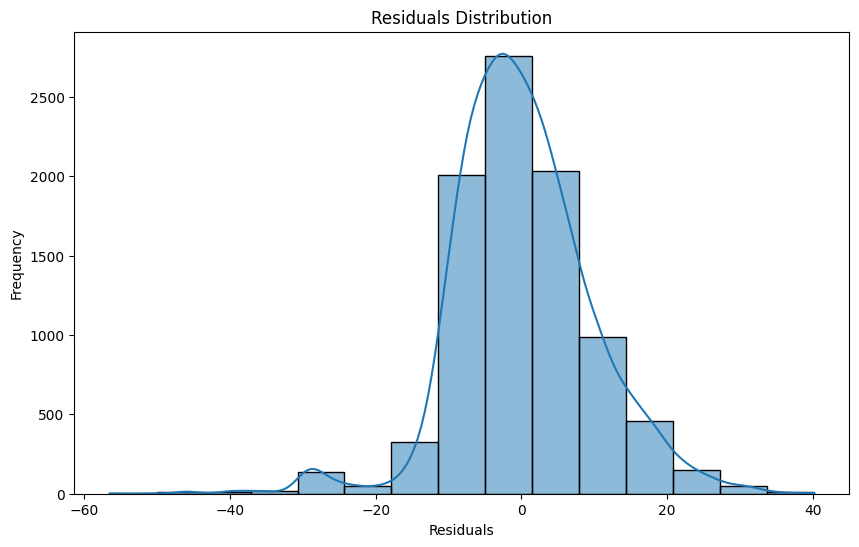

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(y_test - y_pred, bins=15, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [14]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor()
dt_model.fit(X_train_scaled, y_train)

y_pred_dt = dt_model.predict(X_test_scaled)

In [15]:
df_results_tree = X_test.copy()
df_results_tree['popularity_real'] = y_test
df_results_tree['popularity_pred'] = y_pred_dt.round(2)

df_results_tree.head(10)

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,key_A#,...,music_genre_Blues,music_genre_Classical,music_genre_Country,music_genre_Electronic,music_genre_Hip-Hop,music_genre_Jazz,music_genre_Rap,music_genre_Rock,popularity_real,popularity_pred
7977,0.107000,0.531,0.5500,0.000000,0.0950,-6.328,0.0233,96.084,0.3550,False,...,False,False,False,False,False,False,False,False,36.0,22.0
1928,0.000934,0.632,0.9520,0.505000,0.1120,-6.115,0.0414,148.007,0.5890,False,...,False,False,False,True,False,False,False,False,28.0,43.0
5641,0.616000,0.625,0.3050,0.000000,0.0926,-12.507,0.0307,136.053,0.3450,True,...,False,False,False,False,False,False,False,False,29.0,10.0
34707,0.053100,0.583,0.8330,0.000056,0.1600,-8.290,0.0343,119.884,0.8100,False,...,False,False,False,False,False,False,False,True,51.0,58.0
7609,0.000856,0.590,0.9780,0.000000,0.7950,-1.891,0.0934,129.967,0.6620,False,...,False,False,False,False,False,False,False,False,21.0,31.0
34300,0.141000,0.535,0.8030,0.000000,0.2970,-4.116,0.0465,147.902,0.3420,False,...,False,False,False,False,False,False,False,True,54.0,58.0
39926,0.788000,0.137,0.1700,0.881000,0.0988,-28.620,0.0508,55.050,0.0616,False,...,False,True,False,False,False,False,False,False,32.0,31.0
40154,0.982000,0.234,0.0319,0.928000,0.1260,-31.601,0.0416,58.481,0.0572,False,...,False,True,False,False,False,False,False,False,39.0,0.0
25875,0.754000,0.703,0.2190,0.863000,0.2240,-14.361,0.0888,91.963,0.1490,False,...,False,False,False,False,False,False,True,False,65.0,58.0
40342,0.969000,0.195,0.0275,0.000178,0.2310,-28.659,0.0494,172.913,0.0441,True,...,False,True,False,False,False,False,False,False,4.0,22.0


En este caso tenemos un peor desempeño para los arboles de decision, deberiamos cambiar parametros para ver si mejora

In [16]:
mse_tree = mean_squared_error(y_test, y_pred_dt)
rsme_tree = mse_tree ** 0.5
r2_tree = r2_score(y_test, y_pred_dt)
mae_tree = mean_absolute_error(y_test, y_pred_dt)

print(f'Mean Squared Error: {mse_tree}')
print(f'Root Mean Squared Error: {rsme_tree}')
print(f'R-squared: {r2_tree}')
print(f'Mean Absolute Error: {mae_tree}')

Mean Squared Error: 174.97895379831186
Root Mean Squared Error: 13.227961059751872
R-squared: 0.2859847533791072
Mean Absolute Error: 10.003998223011994


Obtuvimos un mejor resultado con el RandomForestRegressor

In [17]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train_scaled, y_train)

y_pred_rf = model_rf.predict(X_test_scaled)

In [18]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf ** 0.5
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print(f'Mean Squared Error (RF): {mse_rf}')
print(f'Root Mean Squared Error (RF): {rmse_rf}')
print(f'R-squared (RF): {r2_rf}')
print(f'Mean Absolute Error (RF): {mae_rf}')

Mean Squared Error (RF): 88.23972085094972
Root Mean Squared Error (RF): 9.393599994195501
R-squared (RF): 0.6399309478226092
Mean Absolute Error (RF): 7.159162012650462


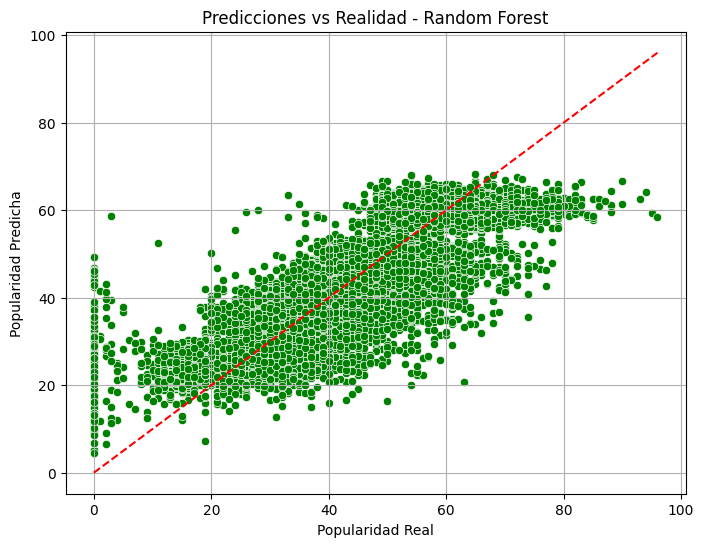

In [19]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_rf, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Popularidad Real")
plt.ylabel("Popularidad Predicha")
plt.title("Predicciones vs Realidad - Random Forest")
plt.grid(True)
plt.show()